In [6]:
import numpy as np
import seaborn as sns
% pylab inline

# Updating parameters

mu = 10
sigma2 = 8

nu = 13
r2 = 2

def update(mu=mu, sigma2=sigma2, nu=nu, r2=r2):
    
    prior = np.random.normal(loc=mu, scale=sigma2, size=10000)
    measurement = np.random.normal(loc=nu, scale=r2, size=10000)

    posterior_mean = ((r2 * mu) + (sigma2 * nu)) / (r2 + sigma2)

    posterior_std = 1 / ((1/r2) + (1/sigma2))
    
    return posterior_mean, posterior_std

Populating the interactive namespace from numpy and matplotlib


In [7]:
update()

(12.4, 1.6)

30.0406254339 6.97821051181


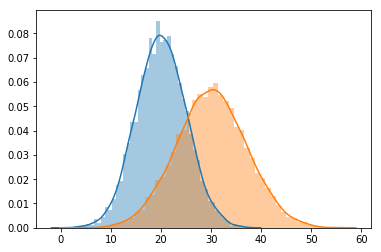

In [8]:
prior = np.random.normal(loc=20, scale=5, size=10000)
movement = np.random.normal(loc=10, scale=2, size=10000)

new_position = prior.mean() + movement.mean()
new_variance = prior.std() + movement.std()

print(new_position, new_variance)

sns.distplot(prior)

sns.distplot(np.random.normal(new_position, new_variance, size=10000))

In [9]:
# Cleaning it up

In [10]:
def predict(mean1, var1, mean2, var2):
    '''Also called the time update, moving, or prediction step'''
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return new_mean, new_var

In [11]:
# Let's see this again

def update(mu, sigma2, nu, r2):
    '''measurement step'''
    new_mean = ((r2 * mu) + (sigma2 * nu)) / (r2 + sigma2)

    new_var = 1 / ((1/r2) + (1/sigma2))
    
    return new_mean, new_var

In [12]:
measurements = np.array([5., 6., 7., 9., 10.])
measurements_var = 4.

motion = np.array([1., 1., 2., 1., 1.])
motion_var = 2

mu = 0
sig = 100

In [16]:
for i in range(len(measurements)):
    mu, sig = update(mu, sig, measurements[i], measurements_var)
    print('measurement:\t\t', mu, sig)
    mu, sig = predict(mu, sig, motion[i], motion_var)
    print('moves then predicts:\t', mu, sig)
    print()

measurement:		 8.09667242079 2.0000000013148083
moves then predicts:	 9.09667242079 4.000000001314808

measurement:		 7.54833621014 2.000000000328702
moves then predicts:	 8.54833621014 4.000000000328702

measurement:		 7.77416810504 2.0000000000821756
moves then predicts:	 9.77416810504 4.000000000082176

measurement:		 9.38708405252 2.000000000020544
moves then predicts:	 10.3870840525 4.000000000020544

measurement:		 10.1935420263 2.000000000005136
moves then predicts:	 11.1935420263 4.0000000000051354

